In [1]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

### Properties (1 part of data sets)

In [3]:
#reading the properties csv using the pandas read_csv() method
properties_raw_data = pd.read_csv('properties.csv', index_col = 0)

In [4]:
# Checking the data types
properties_raw_data.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

### Customers (2 par of data sets)

In [5]:
#reading the customers.csv csv using the pandas read_csv() method
customers_raw_data = pd.read_csv('customers.csv', index_col = 0)

In [6]:
#checking the datatypes
customers_raw_data.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

# Data Cleaning and Preprocessing

## 1.Properties

In [7]:
#creating the 'properties' backup
#This will help to keep data safe 
properties = properties_raw_data.copy()

In [8]:
# Using properties.describe() to examine statistical summaries  
# By default, only numeric columns are included  
# Use 'include="all"' to include all variables 

properties.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


###### 'ID' column appears well-populated with no missing values  
###### IDs are often insignificant in analysis as they are just identifiers  
###### Lack of 'unique', 'top', and 'freq' suggests 'ID' might be numeric  
###### Presence of mean and standard deviation supports this assumption 

In [9]:
# Good time to check the data types  
properties.dtypes

# Confirming our hypothesis, 'ID' appears to be of integer type

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

###### Having 'ID' as an integer can be confusing and sometimes dangerous  
###### IDs should not be treated as numeric variables, so let's change the data type  
###### Casting 'ID' as a string to prevent numerical operations  
###### properties['id'] = properties['id'].astype(str)  

###### Unfortunately, the above code gives an error  
###### Pandas does not recognize the column name 'id'  

In [10]:
# Checking column values to understand the issue  
# 'values' attribute isn't recommended in newer pandas versions  

# Using 'array' attribute instead  
properties.columns.array  

# Encoding issue detected  
# Byte order mark (BOM) was unintentionally fetched  
# BOM is just metadata and isn't visible in the data display

<NumpyExtensionArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [11]:
# Two  fix this: revisit data collection or rename the column  
# Renaming is simple using the 'rename' function  
# 'rename' takes a dictionary mapping old column names to new ones  

properties = properties.rename(columns={'\ufeffid': 'id'})  

# Previewing dataset to confirm changes  
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [12]:
# Now that the column name issue is fixed, we can convert 'ID' to a string  

# Keeping 'ID' as an integer can be confusing and might cause unintended operations  
# Since 'ID' is just an identifier, not a numeric value, we should change its type  
# Converting it to a string ensures no accidental numerical operations  

properties['id'] = properties['id'].astype(str)  

# Checking the 'id' column to confirm the changes  
properties['id']  

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [13]:
# The same rule applies to 'building' and 'property#' variables  
# Converting them to strings to avoid unintended numerical operations  

properties['building'] = properties['building'].astype(str)  
properties['property#'] = properties['property#'].astype(str)  

# Checking the updated data types  
properties.dtypes  

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [14]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


###### Noticing that all variables except 'area' are of type 'object' might be concerning  
###### We previously had columns like 'id', 'building', and 'property#' classified as integers but needed them as strings  
###### This raises the question: Are other variables misclassified as 'object'?  

###### investigate this step by step  
###### Starting with 'date of sale', get some issues  
###### Out of 267 entries, there are 44 unique values—this seems unusual and needs a closer look  

In [15]:
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

###### Our investigation uncovers multiple issues:  

###### 1. Some entries contain '#NUM!', likely an Excel placeholder for missing or incorrect values  

###### 2. All dates are recorded as the first of the month, suggesting we only have month-level data, not exact dates  

###### 3. 'date_sale' is classified as an 'object' type, meaning it's treated as text instead of actual dates  

In [17]:
# Step 1: Replacing '#NUM!' with 'pd.NA'  
# This helps pandas recognize missing values properly  

properties['date_sale'] = np.where(properties['date_sale']=='#NUM!', pd.NA, properties['date_sale'])

In [18]:
# Rechecking unique entries to confirm the changes  
# '#NUM!' placeholders should now be replaced with 'pd.NA'  

properties['date_sale'].unique()  

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [19]:
# Converting 'date_sale' to a date type  
# This makes future analysis and manipulations easier  

properties['date_sale'] = pd.to_datetime(properties['date_sale'])  

# Reviewing the changes  
properties['date_sale']  

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

###### After conversion, 'date_sale' now has 195 total entries  
###### Unique values count dropped to 43  

###### This happened because empty strings were replaced with 'NaT'  
###### Now we have 72 missing values (267 - 195)  

In [20]:
properties.describe(include="all")

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


#### checkig 'type' column


In [21]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [22]:
# Now focusing on the 'type' column  
# It looks well-formatted, but let's standardize it further  

# Converting all entries to lowercase for consistency  

properties['type'] = properties['type'].str.lower()

In [23]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


#### Checking Price

In [24]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

###### Interestingly, 'price' is also an object type  
###### We need to convert it to float for proper numerical analysis  

In [25]:
# The '$' symbol in 'price' is causing it to be treated as a string  
# To fix this, weill remove the '$' sign and create a new column 'price$'  

properties['price$'] = properties['price'].str.strip('$')  

# Previewing the dataset to check the changes  
properties.head()  

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [26]:
# Converting 'price$' to float  

# properties['price$'] = properties['price$'].astype(float)  

# But this fails because the thousands separator ',' is still in the data  

In [27]:
# Using .replace() to remove all ',' occurrences  
# Setting regex=True is important since ',' has multiple interpretations in Python  

properties['price$'] = properties['price$'].replace(",", "", regex=True)  

# Previewing the data again to check our progress  
properties.head()  

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [28]:
# Now converting 'price$' to float  

properties['price$'] = properties['price$'].astype(float)  

In [29]:
# Dropping 'price' column since we no longer need it  
properties = properties.drop(['price'], axis=1)  

# Checking the dataset to confirm the update  
properties.head()  

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


#### Checking status column 

In [30]:
#checking data types first 
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price$               float64
dtype: object

In [31]:
# Next, will review the 'status' column  
# Checking unique values to understand the data

properties['status'].unique()  

array([' Sold ', '-'], dtype=object)

###### Great! No missing values in 'status'  
###### But there's an issue—some entries have extra spaces and capitalization  
###### For consistency, we'll need to clean this up  

In [32]:
# Cleaning up 'status' for consistency  
# Removing extra spaces and converting to lowercase  

properties['status'] = properties['status'].str.strip()  
properties['status'] = properties['status'].str.lower() 

In [33]:
# confirm our changes.
properties['status'].unique()

array(['sold', '-'], dtype=object)

In [34]:
# The '-' symbol most likely means 'not sold yet'  

# Right now, we have two statuses: 'sold' and '-'  
# But using a dash for unsold properties is a bit unusual  

# It makes sense to rename 'status' to 'sold'  
# Then, we'll convert the values to 1s and 0s for a clear binary classification  

properties = properties.rename(columns={'status': 'sold'})

In [35]:
# Using .map() to convert 'sold' into a binary format  

# .map() is useful for converting categorical data into numbers  
# Unlike .rename(), we must explicitly define all possible values  
# Any values not listed will turn into NaN  

properties['sold'] = properties['sold'].map({'sold': 1, '-': 0})  

# Checking unique values to confirm the transformation  
properties['sold'].unique()  

array([1, 0], dtype=int64)

In [36]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
sold                   int64
customerid            object
price$               float64
dtype: object

In [37]:
# Final check for missing values in the dataset  
properties.isna().sum()  

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [38]:
# Final look at our cleaned dataset  
properties  

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [52]:
# Creating a copy of the raw customer data for convenience  
customers = customers_raw_data.copy()  

In [53]:
# Checking the structure of the dataset by inspecting column names   
customers.columns.array  

# Without diving deep into the file, let's examine the column structure  

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [54]:
# rename customerid in an appropriate way
customers = customers.rename(columns= {'\ufeffcustomerid':'customerid'})
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [55]:
# Getting an overview of the dataset  

# Checking descriptive statistics for all variables  
customers.describe(include="all")  


,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [56]:
#check the data types of our variables.
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [57]:
# A quick look suggests there might be missing values  

# Let's confirm by checking the total missing values in each column  
customers.isna().sum()  

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

######  no missing values detected  

###### This could be because all values are stored as strings  
###### We'll revisit this check later in our analysis  

In [58]:
# Renaming 'entity' to 'individual' for better clarity  

customers = customers.rename(columns={'entity': 'individual'})  

# Checking the updated dataset  
customers.head()  

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


#### Checkig 'individual' column

In [59]:
# Converting 'individual' into a Boolean-like variable  

# Mapping 'Individual' to 1 and 'Company' to 0  
customers['individual'] = customers['individual'].str.strip().map({'Individual': 1, 'Company': 0})  

# Checking the updated dataset  
customers  

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,1,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,1,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,1,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,1,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,1,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,1,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,1,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


#### Checking 'SEX' column

In [60]:
# Now,  examine the 'sex' variable.
customers['sex'].unique()

array(['F', 'M', nan], dtype=object)

###### It appears there are three options: 'F', 'M', and an empty string. 
######  mapping the empty string to NaN to indicate missing data.

In [61]:
# Keeping 'sex' as an object variable  

# Mapping 'F' to '1' and 'M' to '0' as strings  
customers['sex'] = customers['sex'].map({'F': '1', 'M': '0','':pd.NA})  

In [62]:
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,Home,4,Yes,Website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,Home,1,No,Website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,Home,4,Yes,Agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,Home,5,No,Website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [63]:
#checking missing value 
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

#### checking 'Purpose' & 'state' column

In [65]:
# Converting 'purpose' and 'source' values to lowercase for consistency  

customers['purpose'] = customers['purpose'].str.lower()  
customers['source'] = customers['source'].str.lower()  

# Checking the updated dataset  
customers.head()  

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


#### Checking 'Mortgage' column

In [66]:
# Converting 'mortgage' to a binary format: 'No' → 0, 'Yes' → 1  

customers['mortgage'] = customers['mortgage'].map({'No': 0, 'Yes': 1})  

# Checking the updated dataframe  
customers.head()  

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website


In [67]:
# Lastly, let's checking for any missing values.
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

#### checking 'name' & 'surname' column

In [68]:
# Creating 'full_name' by combining 'name' and 'surname' with a space in between  

customers['full_name'] = customers['name'] + " " + customers['surname']  

# Checking the updated dataframe  
customers.head()  

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [69]:
# Now that we have 'full_name', we can safely remove 'name' and 'surname' columns  

customers = customers.drop(['name', 'surname'], axis=1)  

# Checking the dataframe after dropping the columns  
customers.head()  

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


#### checking birthdate

In [70]:
# Converting 'birth_date' to datetime format for easier handling  
customers['birth_date'] = pd.to_datetime(customers['birth_date'])  

# Checking the dataframe after conversion  
customers.head()  

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [71]:
# Checking the datatypes of all columns to confirm our transformations  
customers.dtypes 

customerid                   object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [72]:
# Checking for any remaining missing values in the dataset  
customers.isna().sum()

# Since missing values can sometimes be hidden in unconventional forms,  

customerid           0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [73]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


## Combine the two tables

In [74]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [75]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [76]:
# Merging the 'properties' and 'customers' datasets using a left join on 'customerid' 
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Let's check the unique values in the 'customerid' column of the 'properties' dataset.  
properties['customerid'].unique()


array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [78]:
customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [79]:
# To ensure consistency and avoid any whitespace-related mismatches,  
# let's remove leading and trailing spaces from the 'customerid' column in both datasets.

properties['customerid'] = properties['customerid'].str.strip()
customers['customerid'] = customers['customerid'].str.strip()

# Now, we can attempt the merge again and check if the issue is resolved.

In [80]:
# Before merging, let's verify if 'customerid' in the customers dataframe has unique values.
# We'll start by checking the total count of entries in the dataframe.

customers.count()


customerid           162
individual           162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [81]:
# Let's check how many unique 'customerid' values exist in the properties dataframe.
properties['customerid'].nunique()

162

In [82]:
#  identified empty spaces in the 'customerid' column within the properties dataframe.
# These spaces likely indicate properties that haven't been purchased yet.
# To make this clearer, we'll replace them with 'NA' for consistency.

properties['customerid'] = np.where(properties['customerid'] == '', pd.NA, properties['customerid'])

# This step ensures that missing customer IDs are properly recognized as null values.

In [84]:
#merging my data sets again with different name 
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [85]:
# Now that our data preprocessing is complete, let's take a quick look at the first few rows 
# of our newly merged dataset to ensure everything looks as expected.
real_estate_data.head()


,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [86]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Given the numerous NaN values in the dataset, replacing them with pandas' native representation for missing values.  
real_estate_data = real_estate_data.fillna(pd.NA)  

In [88]:
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

# Statistics

In [89]:
# After cleaning and preprocessing, creating a checkpoint  
# Assigning the cleaned dataset to a new variable 'data'  

data = real_estate_data.copy()  

In [90]:
# Inspecting the first few rows of the processed dataset  

data.head()  

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [91]:
# Running descriptive statistics to summarize the dataset  

data.describe()  

,date_sale,area,sold,price$,individual,birth_date,deal_satisfaction,mortgage
count,195,267.000000,267.000000,267.000000,195.000000,178,195.000000,195.000000
mean,2006-11-08 14:38:46.153846272,936.221311,0.730337,281171.901386,0.912821,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,2004-03-01 00:00:00,410.710000,0.000000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2006-04-16 00:00:00,756.210000,0.000000,217553.055000,1.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,2007-03-01 00:00:00,798.280000,1.000000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,2007-09-01 00:00:00,1121.950000,1.000000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,2010-05-01 00:00:00,1942.500000,1.000000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,NaN,284.894858,0.444618,89119.121005,0.282824,NaN,1.340872,0.466878


In [92]:
# Obtaining a comprehensive set of descriptive statistics for all columns, including categorical variables  

data.describe(include="all")  

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Breakdowns by building

We can examine:
1. Breakdown of totals by building (frequency distribution by building)
2. Breakdown of averages by building

In [93]:
# Identifying the unique buildings present in the dataset  
data['building'].unique()  

array(['1', '2', '3', '4', '5'], dtype=object)

In [94]:
# Grouping the data by 'building' to prepare for further analysis  
data.groupby('building')  

In [95]:
# It seems the operation results in a special object type. As per the documentation, 
# this object is best used with an aggregation method. 
# For instance, we can use aggregation methods like count, sum, mean, median, etc.
data.groupby('building').sum(numeric_only=True)

,area,sold,price$,individual,deal_satisfaction,mortgage
building,,,,,,
1,48258.02,46,14307448.61,31.0,167.0,14.0
2,53801.84,54,16339725.35,52.0,190.0,18.0
3,58454.70,53,17668429.10,53.0,189.0,15.0
4,41913.00,23,12480299.17,23.0,89.0,9.0
5,47543.53,19,14276995.44,19.0,67.0,6.0


###### Since the sum of certain variables, like 'area', may not provide meaningful insights,  
###### I will select a subset of 'data' for aggregation.  
###### Specifically, I will focus on the 'price$' and 'area' columns, which are more relevant to the analysis.  

### Breakdown of totals by building

In [96]:
# For a more structured approach,  creating a variable to hold the columns of interest.
# This variable will include the column we want to group by and the columns we wish to aggregate.
# checking the total number of properties sold and those under mortgage per building.
# Additionally, I'll look at the average area, price, and deal satisfaction by building.

#  deriving total counts per building.
columns_of_interest = ['building', 'sold', 'mortgage']

# creating a new variable to hold the total counts grouped by building.
totals_by_building = data[columns_of_interest].groupby("building").sum()
totals_by_building 

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


### Breakdown of averages by building

In [97]:
# Now, I’ll focus on calculating the average values. Here’s the list of columns I’m interested in.
# I’m overwriting the 'columns_of_interest' variable for convenience.
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

#creating new variable to hold the avarage value grouped by building 
averages_by_building = data[columns_of_interest].groupby("building").mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Breakdowns by country and state

Country
1. Breakdown of totals by country (frequency distribution by country)
2. Breakdown of averages by country

State
3. Frequency distribution by state
4. Relative frequency by state
5. Cumulative frequency by state

### Breakdown of totals by country

In [98]:
columns_of_interest = ['country', 'sold','mortgage']
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


While working on breaking down the data by country, I notice that the USA entries are duplicated.
It makes sense to reuse the 'columns_of_interest' list from before for the totals.
I've already determined which totals are relevant, so they remain the same, regardless of the column I aggregate by.
The only change I need to make is swapping 'building' with 'country'.

In [99]:
# there is some duplicate entries for the USA, it's likely that , missed a step in cleaning the data.
#checking the country column again 
data['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', <NA>], dtype=object)

there is a duplicate of USA 
one of them has extra spaces 

In [100]:
#perfoming the cleaning process again 
#there is some for more mistake like this 
#so applying this cleanup process for ll 'object' column 
object_columns = data.select_dtypes(['object']).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [101]:
#using .apply() method to strip all the while spaces from all
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [102]:
#now checking totals-by country again 
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


### Breakdown of averages by country
Since the breakdowns by building and by state have already been performed,it's reasonable to use the same approach for a breakdown by country for the columns 'area', 'deal_satisfaction', and 'price$'.

In [103]:
# For the average computations, using the following list of columns.
columns_of_interest = ['country', 'area', 'deal_satisfaction','price$']

# creating a new variable 'averages_by_country' where will store the data relevant to our calculations.
averages_by_country = data[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Frequency distribution by state

In [104]:
columns_of_interest = ['state', 'sold','mortgage']
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state



,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [105]:
totals_by_state.sold.sum()

181

In [108]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [109]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [110]:
# here's the new result
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [111]:
totals_by_state.sold.sum()

177

In [112]:
# To focus on the relative and cumulative frequency of sales, will  refine our table by state.
#  will start by excluding 'mortgage' from our columns of interest.
columns_of_interest = ['state', 'sold']

# will store this data in a new variable called 'sold_by_state'.
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [113]:
# To get a clearer picture, sorting the values in descending order. This will place the states with the highest sales on top.
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [114]:
# The term 'sold' may not be the best to describe frequency, so  rename this column.
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


### Relative frequency distribution by state
1. Adding a new column to the 'sold_by_state' data frame, called 'relative_frequency' which contains the relative frequency of the different states.
2. Add a new column to the 'sold_by_state' data frame, called 'cumulative_frequency' which contains the cumulative frequency of the different states.

In [115]:
# The relative frequency can be computed by dividing the frequency of each state by the total frequency.
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [116]:
# deriving Cumulative frequency by using the 'cumsum()' function in pandas.
# This function calculates the cumulative sum of values in a Series.
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


# Data Analysis

## Customers Age

In [118]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [119]:
# To calculate the age of the buyers at the time of purchase, 
# will subtract the 'birth_date' from the 'date_sale'.
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [120]:
#we want age in integers ,so will do by using timedelta 
type(data['age_at_purchase'][0].days)

int

In [121]:
# To convert the 'age_at_purchase' timedelta to a numerical value in years, 
# I'll extract the number of days using the '.days' attribute. 
# Then, I'll divide by 365.25 to account for leap years and get the age in years.
# This way, I will have a more usable numeric column for further analysis.

data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [122]:
# To calculate the age at the time of purchase in years, I will divide the 'age_at_purchase' field (in days) by 365.
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [123]:
#rounding this whole number 
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

### Create age intervals
It's important to retain the original values when calculating statistics, as they are more precise.
To divide age into different intervals, I'll use the 'cut' method from pandas.
This function segments and sorts the data values into bins that I specify.
In this case, I'll divide the 'age_at_purchase' into 10 bins and set the decimal precision to 0.

In [124]:
data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

### Breakdown by age interval

In [125]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = data[columns_of_interest].groupby("age_interval").sum()
sold_by_age

C:\Users\Owner\AppData\Local\Temp\ipykernel_25664\4225632607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_by_age = data[columns_of_interest].groupby("age_interval").sum()


,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


## Analysis of the price of properties

### Price interval

In [126]:
#To create 'price_interval', I adopt a similar process to that of 'age_interval'.
# I segment and sort the 'price$' values into 10 bins.
data['price_interval'] = pd.cut(data['price$'], bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

### Total number of properties

In [129]:
# Now, we want to count the total number of properties for each price interval.
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()
# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

C:\Users\Owner\AppData\Local\Temp\ipykernel_25664\2961059913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()


,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


### Total number of sold properties

In [130]:
# For the sold properties,  will count the number of properties sold for each price interval.
# Here,  using the 'sum()' function with 'groupby' as 'sold' here indeed represents properties sold.

columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

C:\Users\Owner\AppData\Local\Temp\ipykernel_25664\1336929878.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()


,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


### Total number of not sold properties

In [131]:
# To identify properties that remain unsold, we can subtract the sold properties from the total count.
# We store this in a new column named 'not_sold' in the original dataframe.
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


## Relationship between age and price

In [132]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,<NA>,322610.74,NaN,...,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,<NA>,279191.26,NaN,...,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,<NA>,287996.53,NaN,...,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,<NA>,365868.78,NaN,...,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,"(327917.905, 369988.672]"


### Filter out only the sold apartments

In [133]:
#  filtering out the properties that have been sold.
# This will be done in a new variable by filtering the 'sold' column for the value of 1.
data_sold = data[data['sold']==1]

In [134]:
# Further,  excluding any company data, focusing only on individual sales.
data_sold = data_sold[data_sold['individual']==1]

In [135]:
# Now, let's narrow our focus to the 'age_at_purchase' and 'price$' columns.
data_sold[['age_at_purchase','price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


### Covariance of age and price

In [136]:
# calculating the covariance of 'age_at_purchase' and 'price$'.
np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

### Correlation of age and price

In [137]:
np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [138]:
# For comprehensive results, I drop any rows with missing values and store this in a new variable 'data_sold_no_na'.
data_sold_no_na = data_sold.dropna()
np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])#, ddof=1)

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

# Data Visulation 

## Deal Satisfaction Across Countries (Bar Chart)
To plot the deal satisfaction by country, I first obtain the relevant data by performing a breakdown of deal satisfaction by country.
This step was done earlier, where the 'deal_satisfaction' was aggregated by 'country'. 








In [139]:
# Since the averages by country have already been calculated, will take the value of the 'averages_by_country' variable to proceed.
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


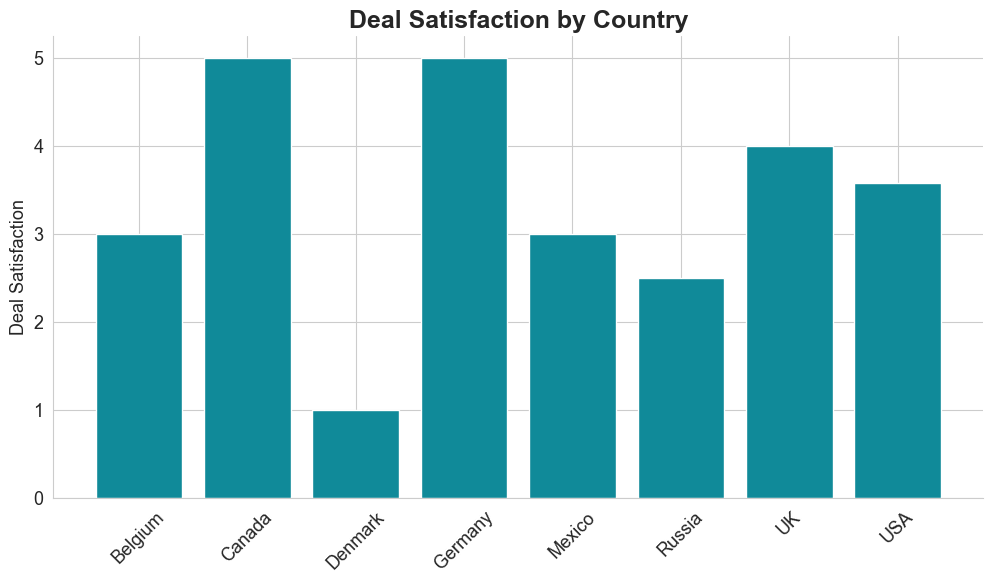

In [140]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) #size of the chart

plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#108A99") # the color for the bars
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.savefig("deal_satisfaction_by_country_bar_chart.png") # you can export your chart as a picture

plt.show()

##  Customer Age Distribution (Histogram) 
To visualize the distribution of customer ages at the time of purchase,  will generate a histogram using the 'data' variable, which already contains the necessary data.



In [141]:
# checking what our data is
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


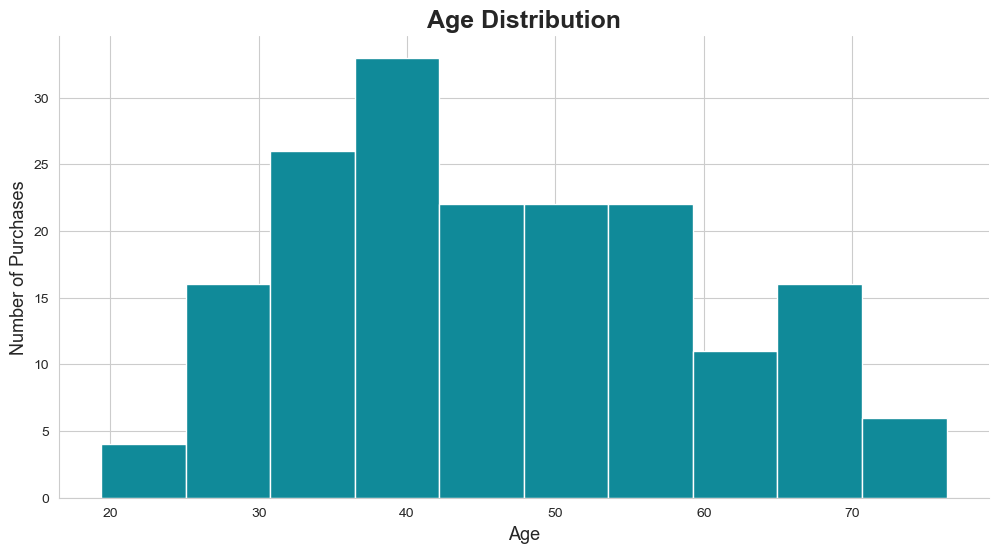

In [142]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.savefig("age_distribution_histogram.png") # save chart as a picture

plt.show()

## Segmentation by State (Pareto diagram)
This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state. For example, there are 4 customers from Virginia.

The secondary axis (the orange line), shows the cumulative frequency. For example, California, Nevada, and Oregon together, account for 82% of all purchases. 

In [143]:
#have already created such a table before
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [144]:
#  need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

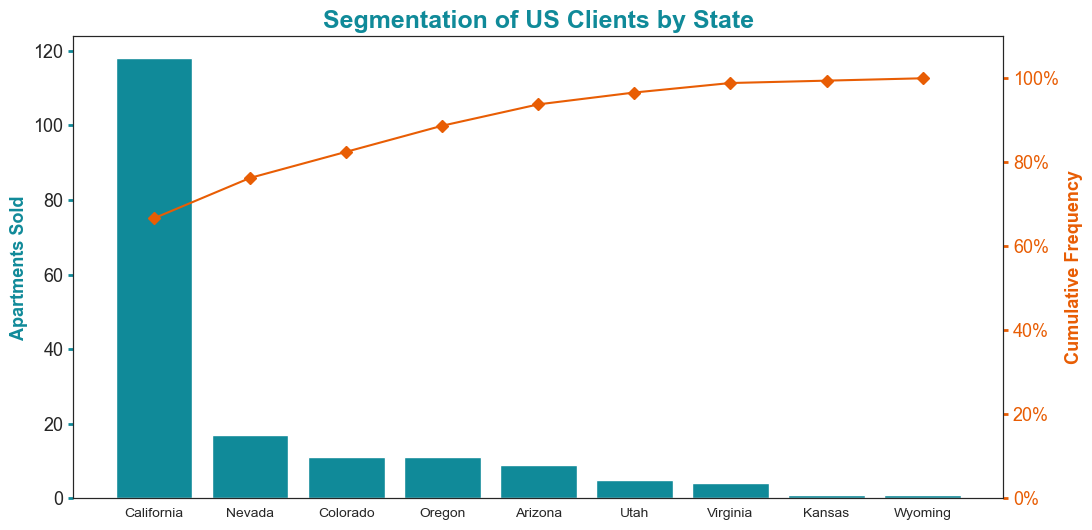

In [145]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, 
#removing the grey background and grid for a cleaner look.

sns.set_style("white") 

# To create the Pareto diagram,  first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of  visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [147]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [149]:
# To visualize the total sales per year, the dataset lacks a breakdown by year, even though it contains timestamp information.
# As a common practice in data analytics, it's essential to backtrack and add features when necessary.

# The 'date_sale' column, which is already in datetime format, needs manipulation to extract the year portion.
# I will create a new column to store the year of purchase by converting the year portion of 'date_sale' into an integer.
data['date_sale'][0].year

2005

In [150]:
# Will do that for the whole series and save the year in a separate column
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [152]:
# The 'year_sale' variable is currently of type float, but fractional years don't accurately reflect our data.
# To correct this, the 'astype' method is used to convert the data type to integer.
# Before conversion, missing values (NAs) are replaced with zeros to avoid errors during the type conversion.
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

# Subsequently, convert all zeros back to NA, restoring our dataset's missing value representation.
data['year_sale'] = data['year_sale'].replace({0:pd.NA})

In [153]:
# Next, we formulate the desired sales breakdown by year.
# Will choose the columns of interest, 'year_sale' and 'price$', and sum all sales for each year.
columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# For clarity,  rename the 'price$' column to 'revenue$'.
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


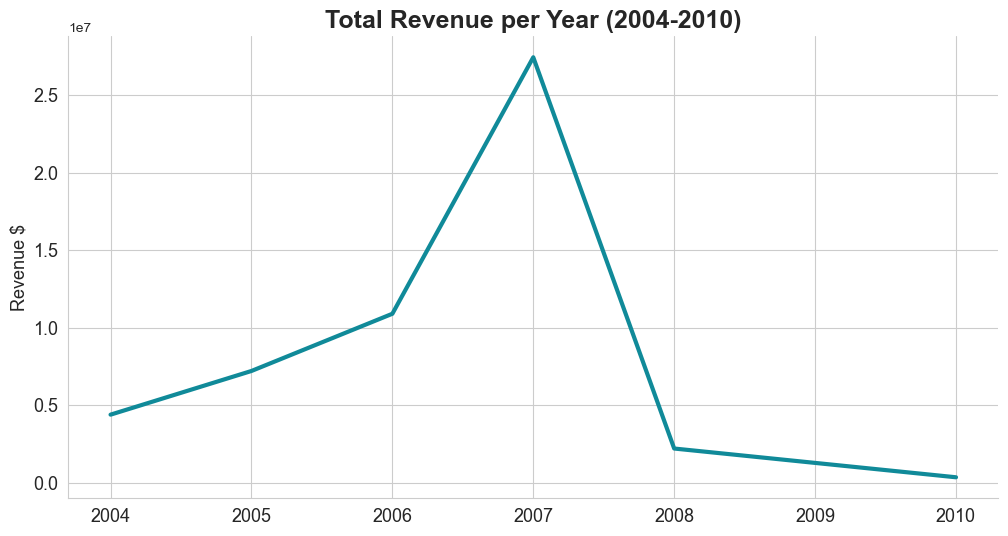

In [154]:
# override the default matplotlib style, opting for a white grid layout.
sns.set_style("whitegrid")

# We'll generate a figure that aligns aesthetically with our other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$'], 
         color='#108A99', 
         linewidth=3)

plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) #  format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() #  remove the top and right borders of the chart for a cleaner look.

# save the visualization as an image file.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() #  display the visualization.

In [155]:
# Several issues detract from the effectiveness of our graph:
# 1. Revenue figures are displayed in scientific notation, which is not readily interpretable.
# 2. The year 2009 lacks its own tick mark, due to its absence from the revenue_per_year dataframe.

# Currently, revenue is represented in dollars, but the figures are large and overwhelming.
# For a cleaner, more comprehensible visualization,  present revenue in thousands or millions.
# To simplify this, will create a new Series named 'revenue$inM'.
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [156]:
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [161]:
# To improve our data representation, will add a new data point for the year 2009.
# This year will display 0 revenue, reflecting the actual situation.
# This will aids in presenting a more accurate reality.
revenue_per_year_adj = revenue_per_year.copy() 
# Adding a new row for the year 2009 with 0 revenue.
new_row = pd.DataFrame({'revenue$': [0], 'revenue$inM': [0]}, index=['2009'])

# Concatenate the new row with the original DataFrame
revenue_per_year_adj = pd.concat([revenue_per_year, new_row])

# Adjusting the index to include 2009
revenue_per_year_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010', '2009']

# Reordering the dataframe to chronologically arrange the years
revenue_per_year_adj = revenue_per_year_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]
print(revenue_per_year_adj)

         revenue$  revenue$inM
2004   4397009.80     4.397010
2005   7215232.41     7.215232
2006  10906000.58    10.906001
2007  27451798.34    27.451798
2008   2212160.05     2.212160
2009         0.00     0.000000
2010    357538.20     0.357538


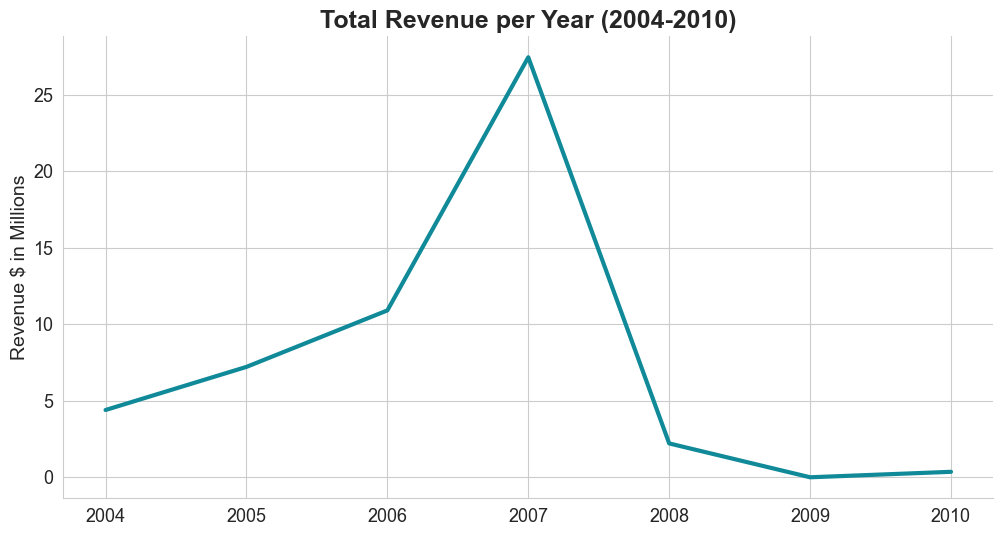

In [162]:
#  plotting with the adjusted data.

sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#108A99', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() # Display the chart.

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)
 creating a stacked area chart that displays the distribution of yearly sales across various buildings:

In [163]:
# For the next steps, we'll need to preprocess the data.
# Thus, create a new data variable for this purpose.
data_stacked_area = data.copy()

In [165]:
# the goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
#  need to split this into separate entities, resulting in five dummy variables.
building_dummies = pd.get_dummies(data_stacked_area['building']).astype(int)
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [166]:
# Now, let's incorporate these dummy variables into our main dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase_rounded,age_interval,price_interval,purchase_year,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005.0,2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005.0,2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007.0,2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007.0,2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004.0,2004,1,0,0,0,0


In [167]:
#  will rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase_rounded,age_interval,price_interval,purchase_year,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005.0,2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005.0,2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007.0,2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007.0,2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004.0,2004,1,0,0,0,0


In [168]:
# Finally, filter out only the sold apartments, as they are the only ones of interest.
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [169]:
# to make the breakdown by year and by bulding
# including the 'year_sale' variable and all the bulding dummies
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


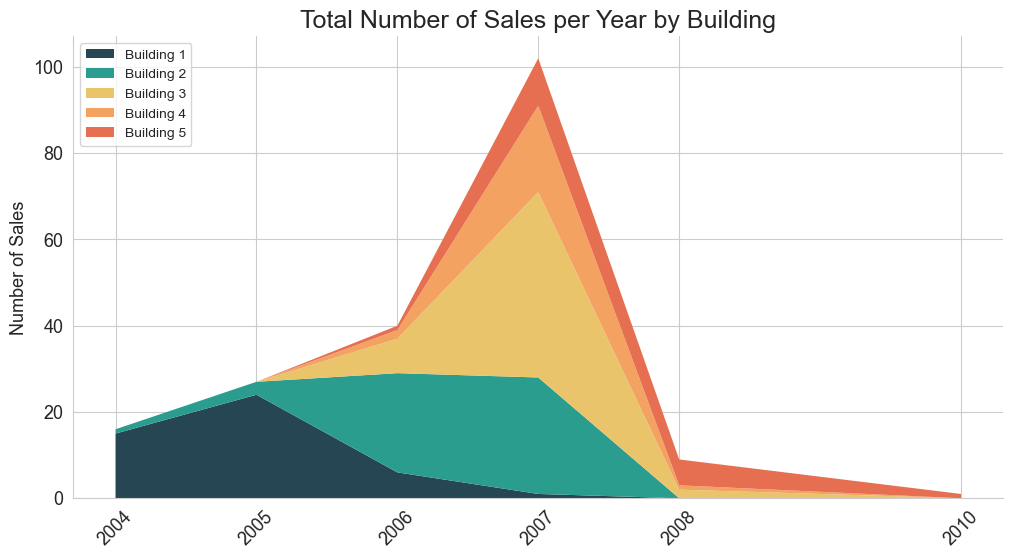

In [171]:
#  choosing different colors for each of the buldings
#  assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

## <strong>Real Estate Market Analysis with Python Project<strong> 